In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import shuffle
from scipy.integrate import ode, odeint
from scipy.sparse import csgraph
from scipy.signal import find_peaks
from scipy.spatial import distance
from scipy.stats import norm
from scipy.interpolate import interp1d
import pickle
from matplotlib.pylab import rcParams
from matplotlib import animation
from IPython.display import HTML

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 6

In [3]:
def make_vanderpl(alpha,omega0_square):
    def vanderpol(X, t):
        x = X[0]
        y = X[1]
        dxdt = y
        dydt = alpha * (1 - x**2)*y-omega0_square*x
        return [dxdt, dydt]
    return vanderpol

In [4]:
def consecutive(data, stepsize=1):
    return np.hsplit(data, np.where(np.diff(data) != stepsize)[0]+1)

In [5]:
def vanDerPolTrajectory(alpha, omega0_square,X0=[2,0],resolution = 2000, t_end = 150):
    t = np.linspace(0,t_end, t_end*resolution+1)
    
    return odeint(make_vanderpl(alpha,omega0_square), X0, t)
    

In [6]:
def TandLC(trajectory, alpha, omega0_square):
    # Neighborhood Radius
    cutoff = np.floor(t_end*resolution*0.2).astype(int)
    T = np.empty(4, dtype=object)
    
    sol_cut = trajectory[-cutoff:]
    peaks, _ = find_peaks(sol_cut[:,0],height=0)
    try:
        ind1= peaks[-2]
        ind2= peaks[-1]
        TrackLC = sol_cut[ind1:ind2+1]
        phaseZ = np.argmax(TrackLC[:,0])
        T[0]= alpha 
        T[1]=omega0_square
        T[2]=((ind2-ind1)/resolution)
        T[3]= np.roll( TrackLC, -phaseZ, axis = 0 )
        return T
        
    except:
        print(alpha)
        print(omega0_square)
        print(peaks)
        T[0]= alpha
        T[1]= omega0_square
        T[2]= np.nan
        T[3]= trajectory#np.nan
        return T

In [7]:
def phaseResponseCurve(LC,
                       alpha=0.005,
                       omega0_square=1,
                       delta = 10**(-1),
                       resolution=2000,
                       testNumber =100,
                      direction = "dx"):
    T=LC.shape[0]
    t = np.linspace(0,10* T/resolution, 10*T+1)
    deltaT= T//testNumber
    t_step= np.arange(0,T,deltaT)
    phase_response = np.zeros(len(t_step))
    for ind, t_start in enumerate(t_step):
        X0_origin=[LC[t_start,0], LC[t_start,1]]
        if (direction=="dx"):
            X0_per = [LC[t_start,0]+delta, LC[t_start,1]]
        else:
            X0_per = [LC[t_start,0], LC[t_start,1]+delta]
        sol_origin = odeint(make_vanderpl(alpha,omega0_square), X0_origin, t)

        sol_per = odeint(make_vanderpl(alpha,omega0_square), X0_per, t)
        
        
        posDif_per=LC-sol_per[-1,:]
        posDif_origin=LC-sol_origin[-1,:]

        t_origin=np.argmin(np.sum(posDif_origin**2,axis=1))
        t_per=np.argmin(np.sum(posDif_per**2,axis=1))
        

        t_diff = -np.float64(t_per-t_origin)/T
        if t_diff >0.9:
            t_diff -= 1
        if t_diff <-0.9:
            t_diff += 1
        phase_response[ind] = t_diff*360
    return phase_response

## $\alpha =0.005$

In [8]:
alpha0 = 0.05
omega0_square = 1
resolution = 2000
t_end = 150
delta = 1
t = np.linspace(0,t_end, t_end*resolution+1)

#Phas trajectory
#initial point
X0out = [2.5, 0]
TrajectoryOut0 = vanDerPolTrajectory(alpha0, omega0_square,X0out,resolution, t_end)
X0in = [1.5, 0]
TrajectoryIn0 = vanDerPolTrajectory(alpha0, omega0_square,X0in,resolution, t_end)
trait0 =TandLC(TrajectoryOut0,alpha0,omega0_square)

PRC0x =phaseResponseCurve(trait0[3],
                       alpha0,
                       omega0_square,
                       10**(-1),
                       resolution,
                       100,
                       "dx")

PRC0y =phaseResponseCurve(trait0[3],
                       alpha0,
                       omega0_square,
                       10**(-1),
                       resolution,
                       100,
                       "dy")

In [9]:
#Strongly

PRC0xS =phaseResponseCurve(trait0[3],
                       alpha0,
                       omega0_square,
                       delta,
                       resolution,
                       200,
                       "dx")

PRC0yS =phaseResponseCurve(trait0[3],
                       alpha0,
                       omega0_square,
                       delta,
                       resolution,
                       200,
                       "dy")

## $\alpha =1$

In [10]:
alpha1 = 1

#Phas trajectory
#initial point
X0out = [2.5, 1]
TrajectoryOut1 = vanDerPolTrajectory(alpha1, omega0_square,X0out,resolution, t_end)
X0in = [1, 1]
TrajectoryIn1 = vanDerPolTrajectory(alpha1, omega0_square,X0in,resolution, t_end)
trait1 =TandLC(TrajectoryOut1,alpha1,omega0_square)

PRC1x =phaseResponseCurve(trait1[3],
                       alpha1,
                       omega0_square,
                       10**(-1),
                       resolution,
                       100,
                       "dx")

PRC1y =phaseResponseCurve(trait1[3],
                       alpha1,
                       omega0_square,
                       10**(-1),
                       resolution,
                       100,
                       "dy")

In [11]:
#Strongly
PRC1xS =phaseResponseCurve(trait1[3],
                       alpha1,
                       omega0_square,
                       delta,
                       resolution,
                       200,
                       "dx")

PRC1yS =phaseResponseCurve(trait1[3],
                       alpha1,
                       omega0_square,
                       delta,
                       resolution,
                       200,
                       "dy")

## $\alpha =10$

In [12]:
alpha10 = 10

#Phas trajectory
#initial point
X0out = [5, 13]
TrajectoryOut10 = vanDerPolTrajectory(alpha10, omega0_square,X0out,resolution, t_end)
X0in = [1, 5]
TrajectoryIn10 = vanDerPolTrajectory(alpha10, omega0_square,X0in,resolution, t_end)
trait10 =TandLC(TrajectoryIn10,alpha10,omega0_square)

PRC10x =phaseResponseCurve(trait10[3],
                       alpha10,
                       omega0_square,
                       10**(-1),
                       resolution,
                       100,
                       "dx")

PRC10y =phaseResponseCurve(trait10[3],
                       alpha10,
                       omega0_square,
                       10**(-1),
                       resolution,
                       100,
                       "dy")

In [13]:
# Strongly

PRC10xS =phaseResponseCurve(trait10[3],
                       alpha10,
                       omega0_square,
                       delta,
                       resolution,
                       200,
                       "dx")

PRC10yS =phaseResponseCurve(trait10[3],
                       alpha10,
                       omega0_square,
                       delta,
                       resolution,
                       200,
                       "dy")

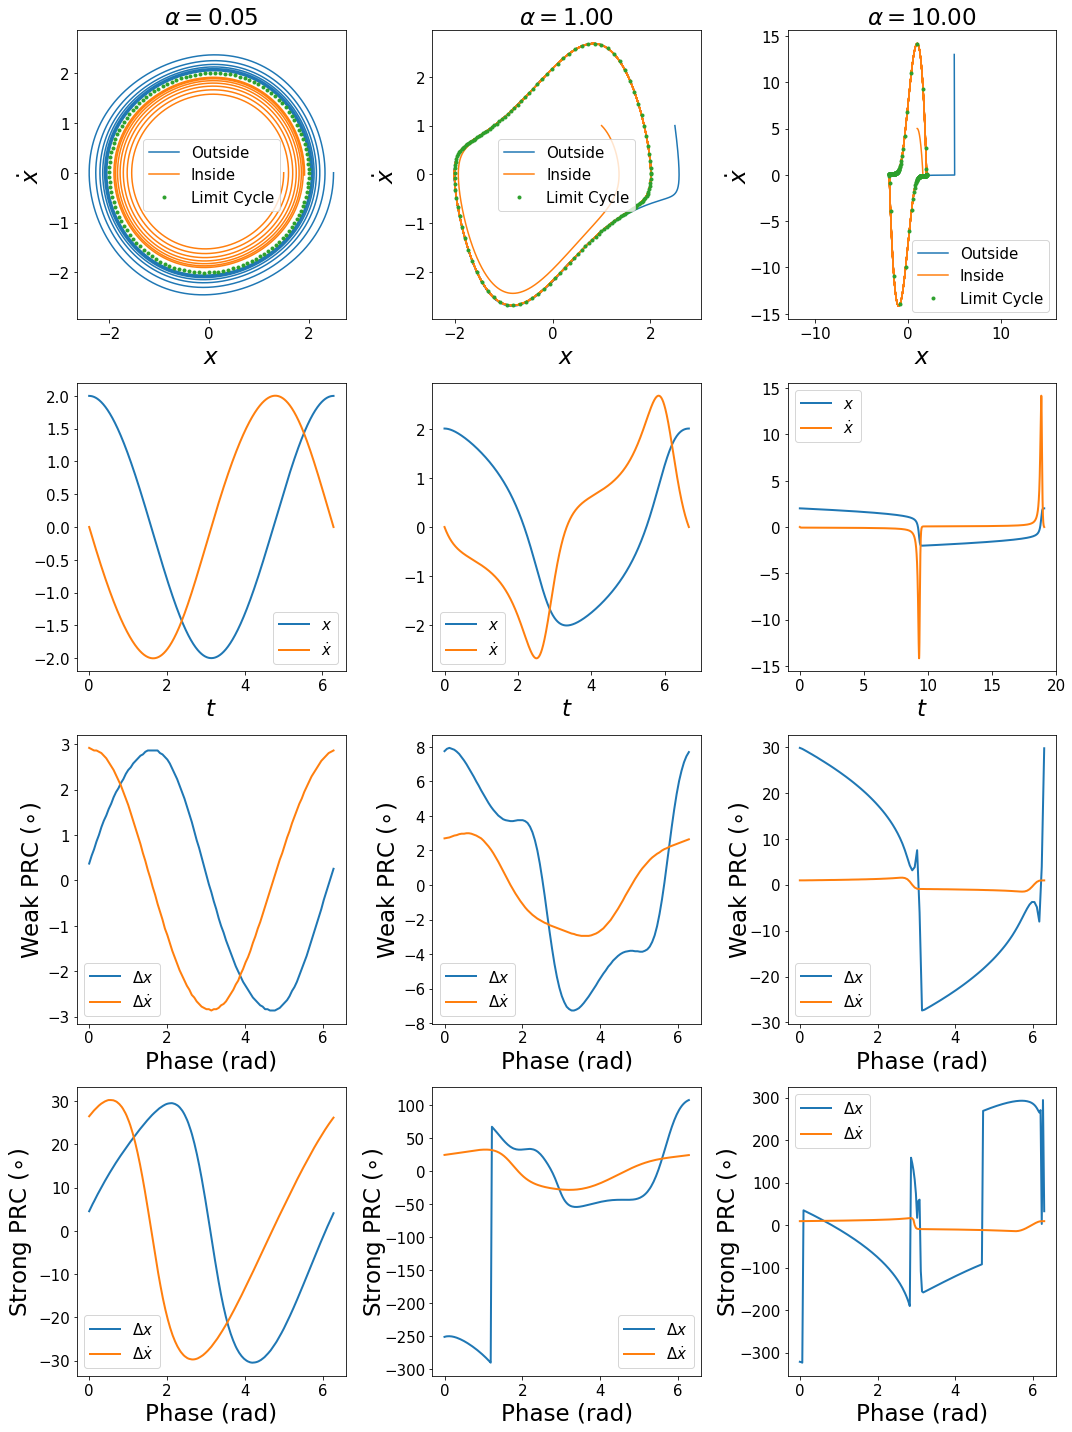

In [23]:
rcParams['figure.figsize'] = 15, 20
titlesize = 23
labelsize = 23
legendsize = 15
ticksize =15
linewidth = 2


# alpha = 0.005
x0 = trait0[3]
plt.subplot(4,3,1)
showEnd = int( 7*trait0[2]*resolution)
plt.title(r'$\alpha=%.2f$'%(alpha0), fontsize =titlesize)
plt.plot(TrajectoryOut0[:showEnd,0],TrajectoryOut0[:showEnd,1],label='Outside')
plt.plot(TrajectoryIn0[:showEnd,0],TrajectoryIn0[:showEnd,1],label='Inside')
plt.plot(x0[::100,0],x0[::100,1],'.',label='Limit Cycle')
plt.axis('equal')
plt.legend(fontsize=legendsize)
plt.xlabel(r'$x$',fontsize=labelsize)
plt.ylabel(r'$\dot{x}$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,4)
plt.plot(np.linspace(0,trait0[2],x0.shape[0]),x0[:,0],label=r'$x$',linewidth = linewidth)
plt.plot(np.linspace(0,trait0[2],x0.shape[0]),x0[:,1],label=r'$\dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'$t$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,7)
plt.plot(np.linspace(0,2*np.pi,len(PRC0x)),PRC0x,label=r'$\Delta x$',linewidth = linewidth)
plt.plot(np.linspace(0,2*np.pi,len(PRC0y)),PRC0y,label=r'$\Delta \dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'Phase (rad)',fontsize=labelsize)
plt.ylabel(r'Weak PRC $(\circ)$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,10)
plt.plot(np.linspace(0,2*np.pi,len(PRC0xS)),PRC0xS,label=r'$\Delta x$',linewidth = linewidth)
plt.plot(np.linspace(0,2*np.pi,len(PRC0yS)),PRC0yS,label=r'$\Delta \dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'Phase (rad)',fontsize=labelsize)
plt.ylabel(r'Strong PRC $(\circ)$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

# alpha = 1
x1 = trait1[3]
plt.subplot(4,3,2)
showEnd = int( 7*trait1[2]*resolution)
plt.title(r'$\alpha=%.2f$'%(alpha1), fontsize =titlesize)
plt.plot(TrajectoryOut1[:showEnd,0],TrajectoryOut1[:showEnd,1],label='Outside')
plt.plot(TrajectoryIn1[:showEnd,0],TrajectoryIn1[:showEnd,1],label='Inside')
plt.plot(x1[::100,0],x1[::100,1],'.',label='Limit Cycle')
plt.axis('equal')
plt.legend(fontsize=legendsize)
plt.xlabel(r'$x$',fontsize=labelsize)
plt.ylabel(r'$\dot{x}$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,5)
plt.plot(np.linspace(0,trait1[2],x1.shape[0]),x1[:,0],label=r'$x$',linewidth = linewidth)
plt.plot(np.linspace(0,trait1[2],x1.shape[0]),x1[:,1],label=r'$\dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'$t$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,8)
plt.plot(np.linspace(0,2*np.pi,len(PRC1x)),PRC1x,label=r'$\Delta x$',linewidth = linewidth)
plt.plot(np.linspace(0,2*np.pi,len(PRC1y)),PRC1y,label=r'$\Delta \dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'Phase (rad)',fontsize=labelsize)
plt.ylabel(r'Weak PRC $(\circ)$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,11)
plt.plot(np.linspace(0,2*np.pi,len(PRC1xS)),PRC1xS,label=r'$\Delta x$',linewidth = linewidth)
plt.plot(np.linspace(0,2*np.pi,len(PRC1yS)),PRC1yS,label=r'$\Delta \dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'Phase (rad)',fontsize=labelsize)
plt.ylabel(r'Strong PRC $(\circ)$',fontsize=labelsize,labelpad=-4)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

# alpha = 10
x10 = trait10[3]
plt.subplot(4,3,3)
showEnd = int( 7*trait10[2]*resolution)
plt.title(r'$\alpha=%.2f$'%(alpha10), fontsize =titlesize)
plt.plot(TrajectoryOut10[:showEnd,0],TrajectoryOut10[:showEnd,1],label='Outside')
plt.plot(TrajectoryIn10[:showEnd,0],TrajectoryIn10[:showEnd,1],label='Inside')
plt.plot(x10[::100,0],x10[::100,1],'.',label='Limit Cycle')
plt.axis('equal')
plt.legend(fontsize=legendsize)
plt.xlabel(r'$x$',fontsize=labelsize)
plt.ylabel(r'$\dot{x}$',fontsize=labelsize,labelpad=-3)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,6)
plt.plot(np.linspace(0,trait10[2],x10.shape[0]),x10[:,0],label=r'$x$',linewidth = linewidth)
plt.plot(np.linspace(0,trait10[2],x10.shape[0]),x10[:,1],label=r'$\dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'$t$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,9)
plt.plot(np.linspace(0,2*np.pi,len(PRC10x)),PRC10x,label=r'$\Delta x$',linewidth = linewidth)
plt.plot(np.linspace(0,2*np.pi,len(PRC10y)),PRC10y,label=r'$\Delta \dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'Phase (rad)',fontsize=labelsize)
plt.ylabel(r'Weak PRC $(\circ)$',fontsize=labelsize,labelpad=-3)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.subplot(4,3,12)
plt.plot(np.linspace(0,2*np.pi,len(PRC10xS)),PRC10xS,label=r'$\Delta x$',linewidth = linewidth)
plt.plot(np.linspace(0,2*np.pi,len(PRC10yS)),PRC10yS,label=r'$\Delta \dot{x}$',linewidth = linewidth)
plt.legend(fontsize=legendsize)
plt.xlabel(r'Phase (rad)',fontsize=labelsize)
plt.ylabel(r'Strong PRC $(\circ)$',fontsize=labelsize,labelpad=-3)
plt.tick_params(axis='both', which='major', labelsize=ticksize)

plt.tight_layout()

# plt.savefig('../img/vanDerPolCharacter.pdf')